In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
import json
import matplotlib.pyplot as plt
import os

In [2]:
# Define function to load sensor data
def load_sensor_data(file_path):
    """
    Load sensor data from a JSON file.
    """
    with open(file_path, 'r') as f:
        data = json.load(f)
    return pd.DataFrame(data)

In [3]:
# Load sensor data
file_path = "sensor_data.json"
df = load_sensor_data(file_path)

In [4]:
df

,temperature,humidity,sound,timestamp
0,26.80,34.70,67.26,2025-02-03T20:41:55.455875
1,19.31,43.83,67.31,2025-02-03T20:41:56.457371
2,25.93,47.57,69.14,2025-02-03T20:41:57.458470
3,18.71,54.06,69.64,2025-02-03T20:41:58.459742
4,25.31,49.00,77.81,2025-02-03T20:41:59.460584
...,...,...,...,...
9995,21.34,53.27,72.82,2025-02-03T23:39:40.876244
9996,21.90,55.42,77.34,2025-02-03T23:39:41.877036
9997,18.79,44.07,113.93,2025-02-03T23:39:42.879195
9998,20.76,51.54,57.01,2025-02-03T23:39:43.880612


In [5]:
# Extract features
X = df[['temperature', 'humidity', 'sound']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Rayzor\AppData\Local\Temp\ipykernel_11660\361712441.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], cmap='coolwarm')


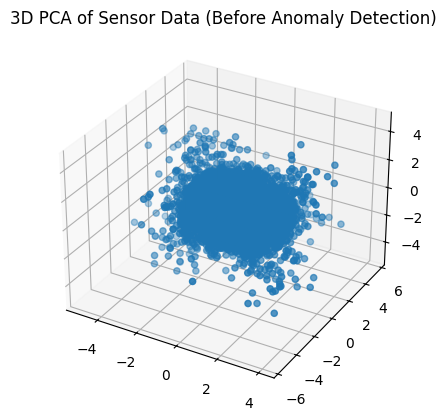

In [7]:
# PCA visualization before anomaly detection
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], cmap='coolwarm')
plt.title('3D PCA of Sensor Data (Before Anomaly Detection)')
plt.savefig('pca_visualization_before.png')  # Save the PCA visualization before anomaly detection
plt.show()

In [20]:
# Train the Isolation Forest model
model = IsolationForest(n_estimators=300, contamination=0.02, random_state=42)
model.fit(X_scaled)

IsolationForest(contamination=0.02, n_estimators=300, random_state=42)

In [21]:
# Predict anomalies
df['anomaly'] = model.predict(X_scaled)
df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)  # Convert -1 (anomalies) to 1 and 1 (normal) to 0

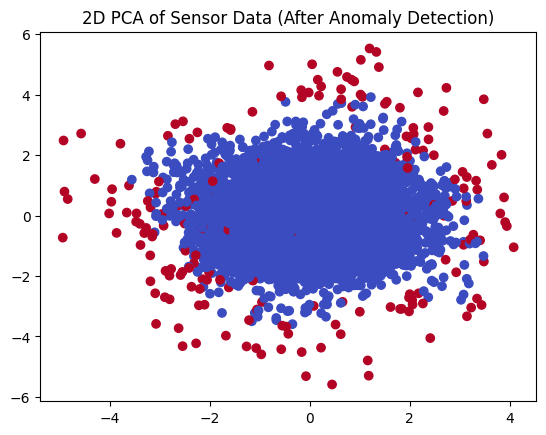

In [23]:
# PCA visualization after anomaly detection (2D)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
fig, ax = plt.subplots()
ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=df['anomaly'], cmap='coolwarm')
plt.title('2D PCA of Sensor Data (After Anomaly Detection)')
plt.savefig('pca_visualization_after_2d.png')  # Save the 2D PCA visualization after anomaly detection
plt.show()

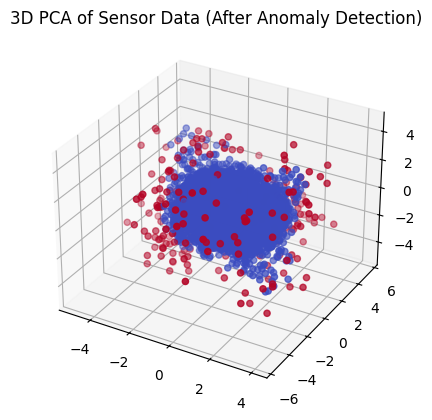

In [22]:
# PCA visualization after anomaly detection
X_pca = pca.transform(X_scaled)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['anomaly'], cmap='coolwarm')
plt.title('3D PCA of Sensor Data (After Anomaly Detection)')
plt.savefig('pca_visualization_after.png')  # Save the PCA visualization after anomaly detection
plt.show()

In [30]:
# Model evaluation with summary statistics
anomaly_ratio = df['anomaly'].mean()
evaluation_report = {
    "anomaly_ratio": anomaly_ratio,
    "temperature": df['temperature'].describe(),
    "humidity": df['humidity'].describe(),
    "sound": df['sound'].describe()
}
print("\nModel Evaluation (Summary Statistics):")
print(evaluation_report)

# Save the model evaluation report to a text file
with open('model_evaluation.txt', 'w') as f:
    f.write("Model Evaluation (Summary Statistics):\n")
    f.write(f"Anomaly Ratio: {anomaly_ratio}\n\n")
    f.write(df[['temperature', 'humidity', 'sound']].describe().to_string())


Model Evaluation (Summary Statistics):
{'anomaly_ratio': np.float64(0.02), 'temperature': count    10000.000000
mean        22.004205
std          2.267592
min          8.840000
25%         20.620000
50%         22.020000
75%         23.390000
max         35.440000
Name: temperature, dtype: float64, 'humidity': count    10000.000000
mean        45.007717
std          5.666340
min         13.370000
25%         41.490000
50%         45.060000
75%         48.532500
max         73.230000
Name: humidity, dtype: float64, 'sound': count    10000.000000
mean        75.089955
std          7.954361
min         30.890000
25%         70.170000
50%         74.970000
75%         79.970000
max        124.550000
Name: sound, dtype: float64}


In [33]:
# Ensure the API directory exists
os.makedirs('../api', exist_ok=True)

# Save the model and scaler using joblib
joblib.dump(model, '../api/anomaly_model.joblib')
joblib.dump(scaler, '../api/scaler.joblib')

print("Model trained and saved to '../api/anomaly_model.joblib'")
print("Scaler saved to '../api/scaler.joblib'")

Model trained and saved to '../api/anomaly_model.joblib'
Scaler saved to '../api/scaler.joblib'
